In [1]:
import os
import pandas as pd
import wrds
from sqlalchemy import text
import datetime
import matplotlib.pyplot as plt
import seaborn as sns

/Users/ishaanpoojari/opt/anaconda3/lib/python3.9/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/Users/ishaanpoojari/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.4' currently installed).
  from pandas.core import (


In [2]:
db = wrds.Connection(wrds_username='user2294')

Loading library list...
Done


In [3]:
# Define the directory containing CSV files
directory = 'Quarterly_Segregated'

# Initialize an empty list to store dataframes
dfs = []

# Loop through each file in the directory
for root, dirs, files in os.walk(directory):
    for file in files:
        # Check if the file is a CSV
        if file.endswith('.csv'):
            # Construct the full path to the CSV file
            file_path = os.path.join(root, file)
            # Read the CSV into a dataframe and append it to the list
            df = pd.read_csv(file_path)
            dfs.append(df)

# Concatenate all dataframes into a single dataframe
combined_df = pd.concat(dfs, ignore_index=True)

#kCBF.zEqH5*,6:c


In [4]:
df = combined_df
df

,Filer Name,Stock Name,Stock Ticker,Quarter Date,Type of Security,Current Shares Held,Current Market Value,Previous Shares Held,Previous Market Value,Current % of Portfolio,Previous % of Portfolio,Current Rank,Previous Rank,Change in Shares,Type of Change,Sector,stock_id
0,"PERSHING SQUARE CAPITAL MANAGEMENT, L.P.",J C Penney Company Inc,CPPRQ,2011-03-31,SH,34919071.0,1.253944e+09,34919071.0,1.128235e+09,21.9317,19.3034,1,1,0.000000,NaN,CONSUMER DISCRETIONARY,338
1,"PERSHING SQUARE CAPITAL MANAGEMENT, L.P.",General Growth Properties Inc. (DE),GGP,2011-03-31,SH,71802853.0,1.111509e+09,69965786.0,1.083070e+09,19.4404,18.5306,2,2,2.625665,addition,REAL ESTATE,230
2,"PERSHING SQUARE CAPITAL MANAGEMENT, L.P.",Beam Inc,BEAM,2011-03-31,SH,16668636.0,1.031622e+09,16668636.0,1.004286e+09,18.0432,17.1827,3,3,0.000000,NaN,CONSUMER DISCRETIONARY,503
3,"PERSHING SQUARE CAPITAL MANAGEMENT, L.P.",Mondelez International Inc. (Kraft Foods),MDLZ,2011-03-31,SH,22239265.0,6.974230e+08,19470089.0,6.135020e+08,12.1980,10.4966,4,5,14.222719,addition,CONSUMER STAPLES,3785
4,"PERSHING SQUARE CAPITAL MANAGEMENT, L.P.",Citigroup Inc.,C,2011-03-31,SH,14670777.7,6.484480e+08,14651428.7,6.930130e+08,11.3414,11.8570,5,4,0.132062,addition,FINANCE,216
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111092,ICAHN CARL C,Take-Two Interactive Software Inc.,TTWO,2010-09-30,SH,2461124.0,2.495600e+07,2357844.0,2.122100e+07,0.4511,0.4534,12,8,4.380273,addition,INFORMATION TECHNOLOGY,3930
111093,ICAHN CARL C,Dynegy Inc. (DE) Class A,DYNIQ,2010-09-30,SH,2399999.0,1.168800e+07,0.0,0.000000e+00,0.2113,NaN,13,999999,NaN,new,UTILITIES AND TELECOMMUNICATIONS,4078
111094,ICAHN CARL C,Enzon Pharmaceuticals Inc,ENZN,2010-09-30,SH,704214.0,7.922000e+06,704214.0,7.500000e+06,0.1432,0.1602,14,12,0.000000,NaN,HEALTH CARE,6903
111095,ICAHN CARL C,Lions Gate Entertainment Corp,LGF,2010-09-30,PRN,316600.0,3.100000e+05,316600.0,3.070000e+05,0.0056,0.0066,15,13,0.000000,NaN,CONSUMER DISCRETIONARY,679


In [5]:
tickers_list = df['Stock Ticker'].unique().tolist()
dates = df["Quarter Date"].unique().tolist()


# Join formatted dates into a string for SQL query
sql_date_string = ', '.join([f"'{date}'" for date in dates])
sql_ticker_string = ', '.join([f"'{ticker}'" for ticker in tickers_list])


In [6]:
query = f"""
SELECT b.date, a.ticker, b.shrout
FROM crsp.dse a
LEFT JOIN crsp.msf b ON a.cusip = b.cusip
WHERE a.ticker IN ({sql_ticker_string}) AND b.date IN ({sql_date_string})
"""

data_df = db.raw_sql(query)
data_df

,date,ticker,shrout
0,2016-09-30,AEPI,5114.0
1,2016-06-30,AEPI,5114.0
2,2016-03-31,AEPI,5107.0
3,2015-12-31,AEPI,5103.0
4,2015-09-30,AEPI,5103.0
...,...,...,...
381440,2019-12-31,SVM,172399.0
381441,2019-09-30,SVM,167880.0
381442,2018-12-31,SVM,168740.0
381443,2017-06-30,SVM,167892.0


In [7]:
data_df.rename(columns={'date': 'Quarter Date', 'ticker': 'Stock Ticker'}, inplace=True)

In [8]:
# Convert 'Quarter Date' column to datetime type
data_df['Quarter Date'] = pd.to_datetime(data_df['Quarter Date'])

# Ensure the 'Stock Ticker' column values are of string type
data_df['Stock Ticker'] = data_df['Stock Ticker'].astype(str)

df['Quarter Date'] = pd.to_datetime(df['Quarter Date'])
# Ensure the 'Stock Ticker' column values are of string type
df['Stock Ticker'] = df['Stock Ticker'].astype(str)
data_df.dropna(subset=['Quarter Date', 'Stock Ticker'], inplace=True)
df.dropna(subset=['Quarter Date', 'Stock Ticker'], inplace=True)
data_df.drop_duplicates(inplace=True)

In [9]:
df[(df['Quarter Date'] ==  '2008-03-31') & (df['Stock Ticker'] == 'JJSF')]


,Filer Name,Stock Name,Stock Ticker,Quarter Date,Type of Security,Current Shares Held,Current Market Value,Previous Shares Held,Previous Market Value,Current % of Portfolio,Previous % of Portfolio,Current Rank,Previous Rank,Change in Shares,Type of Change,Sector,stock_id
82938,SOROS FUND MANAGEMENT LLC,J & J Snack Foods Corp.,JJSF,2008-03-31,SH,8639.0,237000.0,0.0,0.0,0.011,NaN,315,999999,NaN,new,CONSUMER STAPLES,2743


In [10]:
data_df[(data_df['Quarter Date'] ==  '2008-03-31') & (data_df['Stock Ticker'] == 'JJSF')]


,Quarter Date,Stock Ticker,shrout
92,2008-03-31,JJSF,18676.0


In [11]:
merged_df = pd.merge(df, data_df, on=['Quarter Date', 'Stock Ticker'], how='left')

In [12]:
non_nan_rows = merged_df[merged_df['shrout'].notna()]


In [13]:
cleaned_df = non_nan_rows.copy()

In [14]:
cleaned_df['Price'] = cleaned_df['Current Market Value'] / cleaned_df['Current Shares Held']

In [15]:
cleaned_df['Company Market Value'] =  cleaned_df['shrout'] * cleaned_df['Price']

In [16]:
cleaned_df

,Filer Name,Stock Name,Stock Ticker,Quarter Date,Type of Security,Current Shares Held,Current Market Value,Previous Shares Held,Previous Market Value,Current % of Portfolio,Previous % of Portfolio,Current Rank,Previous Rank,Change in Shares,Type of Change,Sector,stock_id,shrout,Price,Company Market Value
1,"PERSHING SQUARE CAPITAL MANAGEMENT, L.P.",General Growth Properties Inc. (DE),GGP,2011-03-31,SH,71802853.0,1.111509e+09,69965786.0,1.083070e+09,19.4404,18.5306,2,2,2.625665,addition,REAL ESTATE,230,964138.0,15.480012,1.492487e+07
2,"PERSHING SQUARE CAPITAL MANAGEMENT, L.P.",Beam Inc,BEAM,2011-03-31,SH,16668636.0,1.031622e+09,16668636.0,1.004286e+09,18.0432,17.1827,3,3,0.000000,NaN,CONSUMER DISCRETIONARY,503,153646.0,61.890007,9.509152e+06
3,"PERSHING SQUARE CAPITAL MANAGEMENT, L.P.",Mondelez International Inc. (Kraft Foods),MDLZ,2011-03-31,SH,22239265.0,6.974230e+08,19470089.0,6.135020e+08,12.1980,10.4966,4,5,14.222719,addition,CONSUMER STAPLES,3785,1748927.0,31.359984,5.484632e+07
4,"PERSHING SQUARE CAPITAL MANAGEMENT, L.P.",Citigroup Inc.,C,2011-03-31,SH,14670777.7,6.484480e+08,14651428.7,6.930130e+08,11.3414,11.8570,5,4,0.132062,addition,FINANCE,216,29118575.0,44.199974,1.287040e+09
5,"PERSHING SQUARE CAPITAL MANAGEMENT, L.P.",Family Dollar Stores Inc.,FDO,2011-03-31,SH,5764187.0,2.958180e+08,0.0,0.000000e+00,5.1739,NaN,6,999999,NaN,new,CONSUMER DISCRETIONARY,2705,126386.0,51.319987,6.486128e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116817,ICAHN CARL C,Lawson Software Inc,LWSN,2010-09-30,SH,3289886.0,2.786500e+07,1902080.0,1.388500e+07,0.5037,0.2967,11,10,72.962546,addition,INFORMATION TECHNOLOGY,243,163054.0,8.469898,1.381051e+06
116818,ICAHN CARL C,Take-Two Interactive Software Inc.,TTWO,2010-09-30,SH,2461124.0,2.495600e+07,2357844.0,2.122100e+07,0.4511,0.4534,12,8,4.380273,addition,INFORMATION TECHNOLOGY,3930,84978.0,10.140082,8.616839e+05
116820,ICAHN CARL C,Enzon Pharmaceuticals Inc,ENZN,2010-09-30,SH,704214.0,7.922000e+06,704214.0,7.500000e+06,0.1432,0.1602,14,12,0.000000,NaN,HEALTH CARE,6903,59668.0,11.249421,6.712305e+05
116821,ICAHN CARL C,Lions Gate Entertainment Corp,LGF,2010-09-30,PRN,316600.0,3.100000e+05,316600.0,3.070000e+05,0.0056,0.0066,15,13,0.000000,NaN,CONSUMER DISCRETIONARY,679,136244.0,0.979154,1.334038e+05


In [17]:

# Group by 'Filer Name' and 'Quarter Date'
grouped = cleaned_df.groupby(['Filer Name', 'Quarter Date'])

# Iterate over each group
for group_name, group_data in grouped:

    # Total Market Value of stocks held by that manager in that quarter
    total_market_value = group_data['Company Market Value'].sum()
    
    # Calculate weights based on market value
    group_data['Weight'] = group_data['Company Market Value'] / total_market_value
    
    # Adjust shares based on weights
    group_data['Adjusted Shares'] = group_data['Weight'] * group_data['Current Shares Held']
    
    # Calculate the new portfolio market value held
    group_data['New Portfolio Market Value'] = group_data['Adjusted Shares'] * group_data['Price']
    
    # Calculate the weight difference
    group_data['Weight Difference'] = group_data['Weight'] - (group_data['New Portfolio Market Value'] / group_data['New Portfolio Market Value'].sum())
    
    # Update DataFrame with adjusted shares
    cleaned_df.loc[group_data.index, 'Adjusted Shares'] = group_data['Adjusted Shares']
    cleaned_df.loc[group_data.index, 'New Portfolio Market Value'] = group_data['New Portfolio Market Value']
    cleaned_df.loc[group_data.index, 'Weight'] = group_data['Weight']
    cleaned_df.loc[group_data.index, 'Weight Difference'] = group_data['Weight Difference']

In [18]:
cleaned_df

,Filer Name,Stock Name,Stock Ticker,Quarter Date,Type of Security,Current Shares Held,Current Market Value,Previous Shares Held,Previous Market Value,Current % of Portfolio,...,Type of Change,Sector,stock_id,shrout,Price,Company Market Value,Adjusted Shares,New Portfolio Market Value,Weight,Weight Difference
1,"PERSHING SQUARE CAPITAL MANAGEMENT, L.P.",General Growth Properties Inc. (DE),GGP,2011-03-31,SH,71802853.0,1.111509e+09,69965786.0,1.083070e+09,19.4404,...,addition,REAL ESTATE,230,964138.0,15.480012,1.492487e+07,7.763530e+05,1.201795e+07,0.010812,-0.007572
2,"PERSHING SQUARE CAPITAL MANAGEMENT, L.P.",Beam Inc,BEAM,2011-03-31,SH,16668636.0,1.031622e+09,16668636.0,1.004286e+09,18.0432,...,NaN,CONSUMER DISCRETIONARY,503,153646.0,61.890007,9.509152e+06,1.148283e+05,7.106724e+06,0.006889,-0.003982
3,"PERSHING SQUARE CAPITAL MANAGEMENT, L.P.",Mondelez International Inc. (Kraft Foods),MDLZ,2011-03-31,SH,22239265.0,6.974230e+08,19470089.0,6.135020e+08,12.1980,...,addition,CONSUMER STAPLES,3785,1748927.0,31.359984,5.484632e+07,8.836393e+05,2.771091e+07,0.039733,-0.002656
4,"PERSHING SQUARE CAPITAL MANAGEMENT, L.P.",Citigroup Inc.,C,2011-03-31,SH,14670777.7,6.484480e+08,14651428.7,6.930130e+08,11.3414,...,addition,FINANCE,216,29118575.0,44.199974,1.287040e+09,1.367894e+07,6.046087e+08,0.932393,0.007526
5,"PERSHING SQUARE CAPITAL MANAGEMENT, L.P.",Family Dollar Stores Inc.,FDO,2011-03-31,SH,5764187.0,2.958180e+08,0.0,0.000000e+00,5.1739,...,new,CONSUMER DISCRETIONARY,2705,126386.0,51.319987,6.486128e+06,2.708511e+04,1.390008e+06,0.004699,0.002573
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116817,ICAHN CARL C,Lawson Software Inc,LWSN,2010-09-30,SH,3289886.0,2.786500e+07,1902080.0,1.388500e+07,0.5037,...,addition,INFORMATION TECHNOLOGY,243,163054.0,8.469898,1.381051e+06,2.402276e+04,2.034703e+05,0.007302,0.006811
116818,ICAHN CARL C,Take-Two Interactive Software Inc.,TTWO,2010-09-30,SH,2461124.0,2.495600e+07,2357844.0,2.122100e+07,0.4511,...,addition,INFORMATION TECHNOLOGY,3930,84978.0,10.140082,8.616839e+05,1.121279e+04,1.136986e+05,0.004556,0.004281
116820,ICAHN CARL C,Enzon Pharmaceuticals Inc,ENZN,2010-09-30,SH,704214.0,7.922000e+06,704214.0,7.500000e+06,0.1432,...,NaN,HEALTH CARE,6903,59668.0,11.249421,6.712305e+05,2.499244e+03,2.811505e+04,0.003549,0.003481
116821,ICAHN CARL C,Lions Gate Entertainment Corp,LGF,2010-09-30,PRN,316600.0,3.100000e+05,316600.0,3.070000e+05,0.0056,...,NaN,CONSUMER DISCRETIONARY,679,136244.0,0.979154,1.334038e+05,2.233117e+02,2.186564e+02,0.000705,0.000705


In [19]:
def identify_strong_conviction_managers(df):
    # Convert 'Quarter Date' to datetime if it's not already in datetime format
    df['Quarter Date'] = pd.to_datetime(df['Quarter Date'])
    
    # Extract year from 'Quarter Date'
    df['Year'] = df['Quarter Date'].dt.year
    
    # Group by 'Filer Name' and 'Year'
    grouped = df.groupby(['Filer Name', 'Year'])
    
    # Calculate median portfolio tilt (weight difference) for each manager within each year
    median_tilt = grouped['Weight Difference'].median()
    
    # Determine the top 30th percentile of managers based on median portfolio tilt
    top_30_percentile = median_tilt.groupby(level='Year').apply(lambda x: x.quantile(0.7))
    
    # Identify managers who fall into the top 30th percentile for each year
    strong_conviction_managers = {}
    for year, tilt_threshold in top_30_percentile.items():
        year_mask = df['Year'] == year
        year_df = df[year_mask]
        year_grouped = year_df.groupby('Filer Name')['Weight Difference'].median()
        strong_managers = year_grouped[year_grouped >= tilt_threshold].index.tolist()
        strong_conviction_managers[year] = strong_managers
    
    return strong_conviction_managers

# Call the function with your DataFrame
strong_conviction_managers = identify_strong_conviction_managers(cleaned_df)


In [20]:
strong_conviction_managers

{2001: ['APPALOOSA LP', 'BERKSHIRE HATHAWAY INC', 'THIRD POINT LLC'],
 2002: ['APPALOOSA LP', 'BERKSHIRE HATHAWAY INC', 'THIRD POINT LLC'],
 2003: ['APPALOOSA LP',
  'BERKSHIRE HATHAWAY INC',
  'FARALLON CAPITAL MANAGEMENT LLC',
  'ICAHN CARL C'],
 2004: ['APPALOOSA LP',
  'BERKSHIRE HATHAWAY INC',
  'GREENLIGHT CAPITAL INC',
  'ICAHN CARL C'],
 2005: ['BERKSHIRE HATHAWAY INC',
  'GREENLIGHT CAPITAL INC',
  'ICAHN CARL C',
  'THIRD POINT LLC'],
 2006: ['APPALOOSA LP',
  'BERKSHIRE HATHAWAY INC',
  'GREENLIGHT CAPITAL INC',
  'PERSHING SQUARE CAPITAL MANAGEMENT, L.P.'],
 2007: ['BERKSHIRE HATHAWAY INC',
  'ICAHN CARL C',
  'LONE PINE CAPITAL LLC',
  'PERSHING SQUARE CAPITAL MANAGEMENT, L.P.'],
 2008: ['ICAHN CARL C',
  'LONE PINE CAPITAL LLC',
  'PERSHING SQUARE CAPITAL MANAGEMENT, L.P.',
  'TIGER GLOBAL MANAGEMENT LLC'],
 2009: ['APPALOOSA LP',
  'ICAHN CARL C',
  'LONE PINE CAPITAL LLC',
  'PERSHING SQUARE CAPITAL MANAGEMENT, L.P.'],
 2010: ['APPALOOSA LP',
  'ICAHN CARL C',
  'PERSHI

In [21]:
def calculate_median_portfolio_tilt(df):
    # Convert 'Quarter Date' to datetime if it's not already in datetime format
    df['Quarter Date'] = pd.to_datetime(df['Quarter Date'])
    
    # Extract year from 'Quarter Date'
    df['Year'] = df['Quarter Date'].dt.year
    
    # Group by 'Filer Name' and 'Year'
    grouped = df.groupby(['Filer Name', 'Year'])
    
    # Calculate median portfolio tilt (weight difference) for each manager within each year
    median_tilt = grouped['Weight Difference'].median()
    
    return median_tilt

# Call the function with your DataFrame
median_portfolio_tilt = calculate_median_portfolio_tilt(cleaned_df)

In [22]:
display(median_portfolio_tilt)

Filer Name                   Year
APPALOOSA LP                 2001    0.006666
                             2002    0.009665
                             2003    0.003499
                             2004    0.003401
                             2005    0.000067
                                       ...   
TRIAN FUND MANAGEMENT, L.P.  2019    0.002762
                             2020    0.002304
                             2021   -0.002067
                             2022   -0.044290
                             2023   -0.006611
Name: Weight Difference, Length: 321, dtype: float64

In [23]:
print(pd.__version__)
sns.__version__
import sys
print(sys.executable)

2.2.2
/Users/ishaanpoojari/opt/anaconda3/bin/python


ValueError: Multi-dimensional indexing (e.g. `obj[:, None]`) is no longer supported. Convert to a numpy array before indexing instead.

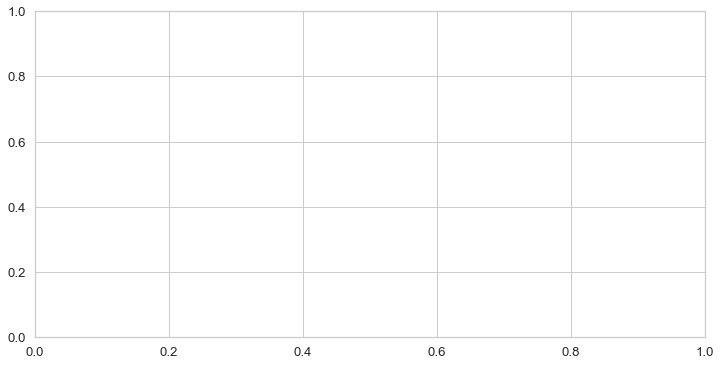

In [24]:
import numpy as np

median_portfolio_tilt.replace([np.inf, -np.inf], np.nan, inplace=True)


# Reset index to access 'Filer Name' and 'Year' as columns
median_portfolio_tilt = median_portfolio_tilt.reset_index()

# Set style and font scale
sns.set(style="whitegrid", font_scale=1.2)

# Create separate plots for each manager
for manager in median_portfolio_tilt['Filer Name'].unique():
    plt.figure(figsize=(12, 6))
    manager_data = median_portfolio_tilt[median_portfolio_tilt['Filer Name'] == manager]
    sns.lineplot(data=manager_data, x="Year", y="Weight Difference", marker='o', markersize=8, linewidth=2)
    plt.title(f"Median Portfolio Tilt for {manager}")
    plt.xlabel("Year")
    plt.ylabel("Median Portfolio Tilt")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


In [53]:
def identify_top_and_lowest_percentile_stocks(df, percentile):
    # Group by 'Quarter Date'
    grouped = df.groupby('Quarter Date')
    
    # Initialize empty dictionaries to store top and lowest percentile stocks
    top_percentile_stocks = {}
    lowest_percentile_stocks = {}

    # Iterate over each quarter
    for quarter_date, quarter_data in grouped:
        # Calculate portfolio tilt (weight difference) for each stock within the quarter
        quarter_data['Portfolio Tilt'] = quarter_data['Weight Difference']
        
        # Drop duplicate rows based on 'Stock Ticker' column
        quarter_data = quarter_data.drop_duplicates(subset='Stock Ticker', keep='first')

        # Identify the top and lowest 30th percentile of stocks based on their portfolio tilt
        top_th_percentile = quarter_data.nlargest(int(len(quarter_data) * percentile), 'Portfolio Tilt')['Stock Ticker'].tolist()
        lowest_th_percentile = quarter_data.nsmallest(int(len(quarter_data) * percentile), 'Portfolio Tilt')['Stock Ticker'].tolist()
        
        # Store the lists of stocks for each quarter
        top_percentile_stocks[quarter_date] = top_th_percentile
        lowest_percentile_stocks[quarter_date] = lowest_th_percentile
    
    return top_percentile_stocks, lowest_percentile_stocks

# Call the function with your DataFrame
top_percentile_stocks, lowest_percentile_stocks = identify_top_and_lowest_percentile_stocks(cleaned_df, 0.1)
selectedStocks = {}

# Display the results
print("Top 10th percentile of stocks in each quarter based on portfolio tilt:")
for quarter_date, stocks in top_percentile_stocks.items():
    print(f"{quarter_date}: {stocks}")
    selectedStocks[quarter_date] = stocks

print("\nLowest 10th percentile of stocks in each quarter based on portfolio tilt:")
for quarter_date, stocks in lowest_percentile_stocks.items():
    print(f"{quarter_date}: {stocks}")


Top 10th percentile of stocks in each quarter based on portfolio tilt:
2001-12-31 00:00:00: ['TWX', 'EIX', 'LNC', 'FE', 'COST', 'PFE', 'TGNA', 'HD', 'STI', 'FCEL', 'SFE', 'AKAM', 'FDC', 'CEM', 'BEV', 'GPS', 'NEOL', 'INTC', 'WFC', 'JAVA', 'MO', 'CCI', 'FALC', 'BLS', 'DOV', 'MTB', 'VIAV', 'DNB', 'SILI', 'PACW', 'DD', 'TXN', 'JNY', 'JPM', 'MCD', 'NHI', 'PARA', 'HRB', 'BA', 'WPO', 'TZH', 'CMTN', 'AMAT', 'OSI', 'Q', 'XLNX', 'PAYX', 'ALL', 'TGT', 'GL', 'CRAY', 'DELL', 'ODP', 'FITB']
2002-09-30 00:00:00: ['WINT', 'AIG', 'INTC', 'PFE', 'TGNA', 'BKS', 'STI', 'COST', 'CSCO', 'FALC', 'DIS', 'JNJ', 'MCD', 'FRTX', 'BEV', 'MDC', 'SGP', 'GPS', 'ACF', 'SILI', 'WFC', 'TXN', 'POG', 'LVLT', 'KRB', 'MRK', 'PACW', 'MTB', 'RTN', 'ODP', 'COP', 'PLX', 'OMC', 'LTC', 'DNB', 'ALD', 'ABT', 'DOV', 'JNY', 'HP', 'BMY', 'S', 'WPO', 'WB', 'G', 'ONE', 'HRB', 'EYE', 'MDT', 'JPM', 'QQQ', 'VVI', 'BAC', 'USB', 'JAVA', 'FITB']
2002-12-31 00:00:00: ['PFE', 'AIG', 'INTC', 'HD', 'MRK', 'AMGN', 'MSI', 'ADP', 'FDC', 'EIX', 'TGNA

In [55]:
len(top_percentile_stocks[pd.Timestamp('2001-12-31 00:00:00')])

54

In [56]:
def momentum_function(df, quarter_date):
    # Calculate the start date of the quarter
    quarter_start_date = quarter_date - pd.offsets.QuarterBegin(startingMonth=1)

    # Convert Timestamps to strings for the SQL query
    start_date_str = quarter_start_date.strftime('%Y-%m-%d')
    end_date_str = quarter_date.strftime('%Y-%m-%d')

    # Initialize a dictionary to store momentum values for each stock
    momentum_values = {}

    # Fetch and calculate momentum for each stock in the universe for the given quarter
    for ticker in top_percentile_stocks[quarter_date]:
        # Fetch daily returns from WRDS
        query = f"""
        SELECT a.date, a.ret
        FROM crsp.dsf a
        INNER JOIN crsp.dsenames AS b ON a.permno = b.permno
        WHERE b.ticker = '{ticker}' AND a.date BETWEEN '{start_date_str}' AND '{end_date_str}'
        AND b.namedt <= a.date AND a.date <= b.nameendt
        """
        data = db.raw_sql(query)
        
        # Ensure the 'ret' column is numeric and replace inf/nan if necessary
        data['ret'] = pd.to_numeric(data['ret'], errors='coerce').fillna(0)
        
        # Calculate cumulative return for the quarter as momentum
        momentum = (1 + data['ret']).prod() - 1
        
        momentum_values[ticker] = momentum

    return momentum_values


stock_momentums = momentum_function(cleaned_df, pd.Timestamp('2023-06-30 00:00:00'))
# Make an map where k is the quarter and the value is a list of tuple with ticker and momentum - will need to modify the function to return list of tuples for each stock

PendingRollbackError: Can't reconnect until invalid transaction is rolled back.  Please rollback() fully before proceeding (Background on this error at: https://sqlalche.me/e/20/8s2b)

importing Jupyter notebook from Portfolio Tilt V4.ipynb
Loading library list...
Done


Filer Name                   Year
APPALOOSA LP                 2001    0.006666
                             2002    0.009665
                             2003    0.003499
                             2004    0.003401
                             2005    0.000067
                                       ...   
TRIAN FUND MANAGEMENT, L.P.  2019    0.002762
                             2020    0.002304
                             2021   -0.002067
                             2022   -0.044290
                             2023   -0.006611
Name: Weight Difference, Length: 321, dtype: float64

2.2.2
/Users/ishaanpoojari/opt/anaconda3/bin/python


ValueError: Multi-dimensional indexing (e.g. `obj[:, None]`) is no longer supported. Convert to a numpy array before indexing instead.

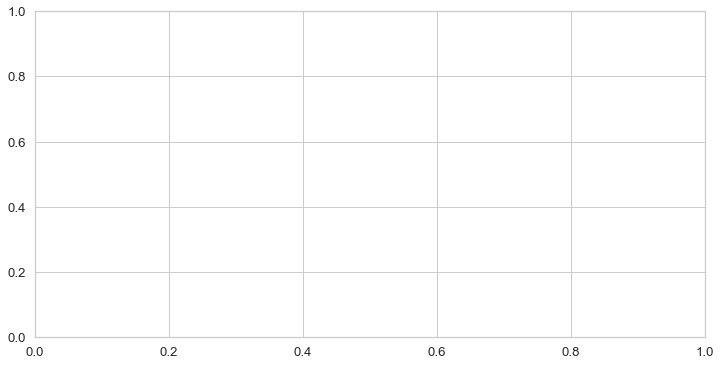

In [28]:
import import_ipynb
from Portfolio_Tilt_V4 import *

In [66]:
import pickle

# From the original stock universe
with open('StockUniverse1.pkl', 'rb') as f:
    selectedStocks_1 = pickle.load(f)

selectedStocks_1

{Timestamp('2001-12-31 00:00:00'): ['C',
  'NXTL',
  'TWX',
  'EIX',
  'LNC',
  'FE',
  'ELN',
  'T',
  'T',
  'PVN',
  'IBM',
  'PVN',
  'COST',
  'VIAV',
  'PFE',
  'TGNA',
  'HD',
  'STI',
  'FCEL',
  'SFE',
  'MRK',
  'AKAM',
  'FDC',
  'DD',
  'CEM',
  'BEV',
  'GPS',
  'NEOL',
  'FE',
  'INTC',
  'WFC',
  'JAVA',
  'MO',
  'EVRG',
  'INTC',
  'DD',
  'DELL',
  'CCI',
  'FALC',
  'ITWO',
  'BLS',
  'DOV',
  'MTB',
  'VIAV',
  'SGP',
  'DNB',
  'ITWO',
  'SILI',
  'PARA',
  'PACW',
  'DD',
  'TXN',
  'DIS',
  'ODP',
  'TT',
  'JNY',
  'JPM',
  'MCD',
  'AWE',
  'NHI',
  'PARA',
  'HRB',
  'BA',
  'WPO',
  'PVN',
  'G',
  'TZH',
  'CMTN',
  'DNB',
  'AMAT',
  'OSI',
  'QQQ',
  'Q',
  'XLNX',
  'PAYX',
  'ALL',
  'MCO',
  'TGT',
  'GL',
  'GPS',
  'MXIM',
  'CRAY',
  'WM'],
 Timestamp('2002-09-30 00:00:00'): ['WINT',
  'C',
  'C',
  'T',
  'T',
  'AIG',
  'PCG',
  'INTC',
  'PFE',
  'ADP',
  'TGNA',
  'BKS',
  'STI',
  'ETS',
  'COST',
  'CSCO',
  'FRTX',
  'INTC',
  'FALC',
  'DIS',

In [57]:
selectedStocks

{Timestamp('2001-12-31 00:00:00'): ['TWX',
  'EIX',
  'LNC',
  'FE',
  'COST',
  'PFE',
  'TGNA',
  'HD',
  'STI',
  'FCEL',
  'SFE',
  'AKAM',
  'FDC',
  'CEM',
  'BEV',
  'GPS',
  'NEOL',
  'INTC',
  'WFC',
  'JAVA',
  'MO',
  'CCI',
  'FALC',
  'BLS',
  'DOV',
  'MTB',
  'VIAV',
  'DNB',
  'SILI',
  'PACW',
  'DD',
  'TXN',
  'JNY',
  'JPM',
  'MCD',
  'NHI',
  'PARA',
  'HRB',
  'BA',
  'WPO',
  'TZH',
  'CMTN',
  'AMAT',
  'OSI',
  'Q',
  'XLNX',
  'PAYX',
  'ALL',
  'TGT',
  'GL',
  'CRAY',
  'DELL',
  'ODP',
  'FITB'],
 Timestamp('2002-09-30 00:00:00'): ['WINT',
  'AIG',
  'INTC',
  'PFE',
  'TGNA',
  'BKS',
  'STI',
  'COST',
  'CSCO',
  'FALC',
  'DIS',
  'JNJ',
  'MCD',
  'FRTX',
  'BEV',
  'MDC',
  'SGP',
  'GPS',
  'ACF',
  'SILI',
  'WFC',
  'TXN',
  'POG',
  'LVLT',
  'KRB',
  'MRK',
  'PACW',
  'MTB',
  'RTN',
  'ODP',
  'COP',
  'PLX',
  'OMC',
  'LTC',
  'DNB',
  'ALD',
  'ABT',
  'DOV',
  'JNY',
  'HP',
  'BMY',
  'S',
  'WPO',
  'WB',
  'G',
  'ONE',
  'HRB',
  'EYE'

In [58]:
selectedStocks[pd.Timestamp('2001-12-31 00:00:00')]
pd.set_option('display.max_colwidth', None)
stocks_df = pd.DataFrame(selectedStocks.items(), columns=['Quarter Date', 'Stocks'])
stocks_df


,Quarter Date,Stocks
0,2001-12-31,"[TWX, EIX, LNC, FE, COST, PFE, TGNA, HD, STI, FCEL, SFE, AKAM, FDC, CEM, BEV, GPS, NEOL, INTC, WFC, JAVA, MO, CCI, FALC, BLS, DOV, MTB, VIAV, DNB, SILI, PACW, DD, TXN, JNY, JPM, MCD, NHI, PARA, HRB, BA, WPO, TZH, CMTN, AMAT, OSI, Q, XLNX, PAYX, ALL, TGT, GL, CRAY, DELL, ODP, FITB]"
1,2002-09-30,"[WINT, AIG, INTC, PFE, TGNA, BKS, STI, COST, CSCO, FALC, DIS, JNJ, MCD, FRTX, BEV, MDC, SGP, GPS, ACF, SILI, WFC, TXN, POG, LVLT, KRB, MRK, PACW, MTB, RTN, ODP, COP, PLX, OMC, LTC, DNB, ALD, ABT, DOV, JNY, HP, BMY, S, WPO, WB, G, ONE, HRB, EYE, MDT, JPM, QQQ, VVI, BAC, USB, JAVA, FITB]"
2,2002-12-31,"[PFE, AIG, INTC, HD, MRK, AMGN, MSI, ADP, FDC, EIX, TGNA, ODP, DELL, STI, CCI, GPS, COST, PNC, FRTX, TGT, AMAT, WINT, FALC, T, ISIL, CSCO, WTW, HWM, RTN, ADCT, MTB, SWKS, EMC, BBY, DNB, PARA, RRI, XOM, DOV, PACW, JNY, HPQ, POG, SLAB, XJT, MU, TQNT, WPO, MET, FDX, THG, HRB, WFC]"
3,2003-03-31,"[FRTX, C, TWX, WINT, DUK, LVLT, MRK, FDC, T, DELL, MS, PARA, ADP, TGNA, EIX, BMY, STI, COST, GPS, NOK, CMTN, FALC, TXN, HPQ, GS, WM, DNB, MTB, FDX, MET, NOC, DOV, TT, DISH, QMCO, LU, MXIM, OVV, LLTC, HAL, GDW, HRB, OSI, VTR, WPO, DIA, FE, FNFG, RRI]"
4,2003-06-30,"[NEOL, LVLT, DUK, DELL, C, TWX, SFE, CMTN, FDC, INTC, MS, JNP, FALC, ADP, TGNA, COST, BBX, STI, GPS, AWE, EMC, HUM, WYE, AYE, WM, IP, FDX, QQQ, MET, FL, WY, MTB, FNFG, NOC, NTZ, SDS, DNB, THG, QMCO, PACW, TXN, LU, DISH, CNXT, HAL, DOV, GNTA, PFS, XEL, TLM]"
...,...,...
59,2022-03-31,"[INTC, IFF, SD, CP, XLE, FE, UNP, JNJ, MSFT, JPM, PG, NFLX, VOO, BKNG, NVDA, NWL, VZ, SWX, ABBV, BABA, CVX, GS, QCOM, V, TMUS, KO, UPS, HRI, AVGO, WBT, AMZN, CVS, PNC, NKE, UBER, C, BAC, NSC, NSP, EFA, VTI, FCX, DAN, TSM, EPD, PXD, DPZ, MDLZ, PEP, MMC, XRX, TJX, ADI, ADBE, AXP, ABT, IVW, SNX, MRK, ILMN, MA, USB, SNOW, DK, MCD, MPLX, TXN, OIH, LIN, TEL, GM, XLF, CNX, EMBK, PM, CVE, NWS, WMT, MCO, LVS, HON, NOW, MSI, CRM, LCID, GPK, RTX]"
60,2022-06-30,"[CP, SD, IFF, XLE, LNG, TMUS, DIS, FE, JPM, JNJ, PG, ABBV, WBD, TSLA, VOO, BLCO, NWL, MSFT, SWX, ACN, NVDA, CNXC, SHY, GS, CSX, UPS, CCI, CL, QCOM, DPZ, CVX, NKE, CVS, SPGI, BKNG, EFA, KO, HRI, CVE, META, WGS, PEP, ADI, MDLZ, C, TSM, VTI, DAN, GPK, MMC, V, CNX, ABT, CHTR, MRK, XRX, CMCSA, NWS, HLT, BMY, IVW, CIVI, EPD, PM, UBER, NEE, MCD, MU, USB, ADBE, LIN, TXN, SHOP, WMB, BAC, ABNB, AXP, MDT]"
61,2022-09-30,"[INTC, AMZN, IFF, TSLA, RIVN, TMUS, CP, DIS, JNJ, FE, JPM, PG, VOO, TJX, CSX, HLT, ABBV, GOOGL, INTU, SHY, NWL, PYPL, GLD, UNP, UPS, SWX, NVDA, CVX, GS, CCI, KO, META, MSFT, ACN, QCOM, CVS, BABA, CNXC, GPK, HRI, DD, TTWO, V, FERG, C, QSR, MDLZ, MMC, BKNG, VTI, SLV, PEP, ADI, AVGO, NKE, CIVI, ADBE, ABT, MRK, LNG, CNQ, NEE, EPD, BAC, CNX, BMY, EFA, WGS, NWS, USB, GOOG, SNOW, MCD, DAN]"
62,2023-03-31,"[GOOGL, ILMN, AMZN, J, NVDA, TSLA, GEHC, FE, GLD, JNJ, CCK, PG, VOO, FCNCA, BLCO, UNP, V, PDBC, CVX, AMD, TMUS, MA, SLV, NWL, KO, UPS, JPM, GPK, NYCB, HRI, WMT, LLY, CNXC, NFLX, GS, QCOM, AVGO, SWX, BAC, MDLZ, EFA, C, OIH, VTI, NKE, MU, MMC, AMAT, CIVI, INTC, BABA, MRK, REZI, FDX, UBS, HCA, DAN, UNH, ADBE, ACN, SO, ABT, AXP, LIN, ELV, ICE, XRX]"


In [59]:
import yfinance as yf

def get_data(tickers, start_date, end_date):
    data = yf.download(tickers, start=start_date, end=end_date)['Adj Close']
    return data

# Function to calculate quarterly returns
def calculate_returns(data):
    returns = data.pct_change().dropna()
    mean_return = returns.mean()
    std_dev = returns.std()
    # Sharpe Ratio assumes risk-free rate is negligible for this example
    sharpe_ratio = mean_return / std_dev if std_dev != 0 else 0
    return mean_return, sharpe_ratio

# Main analysis loop
results = {}
for end_date, stocks in selectedStocks.items():
    start_date = pd.to_datetime(end_date) - pd.DateOffset(months=3)
    stock_data = get_data(stocks, start_date, end_date)
    sp_data = get_data('^GSPC', start_date, end_date)

    stock_returns, stock_sharpe = calculate_returns(stock_data.mean(axis=1))  # Average stock performance
    sp_returns, sp_sharpe = calculate_returns(sp_data)

    results[end_date] = {
        'Stock Returns': stock_returns,
        'S&P Returns': sp_returns,
        'Stock Sharpe Ratio': stock_sharpe,
        'S&P Sharpe Ratio': sp_sharpe
    }

# Display the results
results_df = pd.DataFrame(results).T  # Transpose to make quarters the rows
print(results_df)

[*********************100%%**********************]  54 of 54 completed

19 Failed downloads:
['WPO', 'TZH', 'CMTN', 'SILI', 'Q']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2001-09-30 00:00:00 -> 2001-12-31 00:00:00)')
['CEM', 'BEV', 'STI', 'DELL', 'PARA', 'DNB', 'JAVA', 'OSI', 'NEOL']: Exception("%ticker%: Data doesn't exist for startDate = 1001822400, endDate = 1009774800")
['SFE', 'CRAY', 'PACW', 'XLNX', 'FDC']: Exception('%ticker%: No timezone found, symbol may be delisted')
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  56 of 56 completed

20 Failed downloads:
['RTN', 'BKS', 'PACW', 'ONE']: Exception('%ticker%: No timezone found, symbol may be delisted')
['POG', 'G', 'S', 'STI', 'DNB', 'SGP', 'ACF', 'EYE', 'ALD', 'WB', 'JAVA', 'KRB', 'VVI']: Exception("%ticker%: Data doesn't exist for startDate = 1025409600, endDate = 1033358400")
['WPO', 'LVLT', 'SILI']: Exception('%ticker%: No pri

            Stock Returns  S&P Returns  Stock Sharpe Ratio  S&P Sharpe Ratio
2001-12-31       0.002599     0.001855            0.075909          0.174498
2002-09-30       0.001256    -0.002290            0.018052         -0.101350
2002-12-31       0.008133     0.001349            0.124587          0.077932
2003-03-31      -0.008952    -0.000199           -0.200259         -0.013154
2003-06-30       0.005994     0.002326            0.282890          0.217895
...                   ...          ...                 ...               ...
2022-03-31      -0.000786    -0.000483           -0.048378         -0.035776
2022-06-30      -0.003156    -0.002847           -0.169465         -0.159020
2022-09-30      -0.000677    -0.000530           -0.044447         -0.039385
2023-03-31       0.001183     0.001015            0.101384          0.095796
2023-06-30       0.001799     0.001349            0.210227          0.179217

[64 rows x 4 columns]


In [60]:
results_df

,Stock Returns,S&P Returns,Stock Sharpe Ratio,S&P Sharpe Ratio
2001-12-31,0.002599,0.001855,0.075909,0.174498
2002-09-30,0.001256,-0.002290,0.018052,-0.101350
2002-12-31,0.008133,0.001349,0.124587,0.077932
2003-03-31,-0.008952,-0.000199,-0.200259,-0.013154
2003-06-30,0.005994,0.002326,0.282890,0.217895
...,...,...,...,...
2022-03-31,-0.000786,-0.000483,-0.048378,-0.035776
2022-06-30,-0.003156,-0.002847,-0.169465,-0.159020
2022-09-30,-0.000677,-0.000530,-0.044447,-0.039385
2023-03-31,0.001183,0.001015,0.101384,0.095796


In [61]:
# Calculate differences in returns and Sharpe ratios
results_df['Return Difference'] = results_df['Stock Returns'] - results_df['S&P Returns']
results_df['Sharpe Ratio Difference'] = results_df['Stock Sharpe Ratio'] - results_df['S&P Sharpe Ratio']

# Calculate overall statistics across all quarters
overall_stats = {
    'Average Return Difference': results_df['Return Difference'].mean(),
    'Standard Deviation of Return Differences': results_df['Return Difference'].std(),
    'Average Sharpe Ratio Difference': results_df['Sharpe Ratio Difference'].mean(),
    'Standard Deviation of Sharpe Ratio Differences': results_df['Sharpe Ratio Difference'].std(),
}

print("Overall Statistics across all Quarters:")
for stat, value in overall_stats.items():
    print(f"{stat}: {value:.4f}")

Overall Statistics across all Quarters:
Average Return Difference: 0.0026
Standard Deviation of Return Differences: 0.0240
Average Sharpe Ratio Difference: -0.0435
Standard Deviation of Sharpe Ratio Differences: 0.1135


ValueError: Multi-dimensional indexing (e.g. `obj[:, None]`) is no longer supported. Convert to a numpy array before indexing instead.

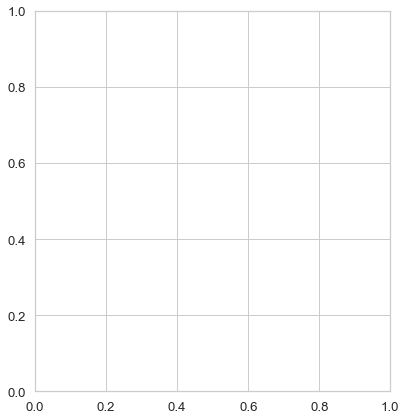

In [63]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert index to datetime if it's not already
results_df.index = pd.to_datetime(results_df.index)

plt.figure(figsize=(14, 7))
results_df['Stock Sharpe Ratio'].to_numpy()
results_df['S&P Sharpe Ratio'].to_numpy()

# Plot Sharpe Ratios, ensuring data is 1D numpy arrays
plt.subplot(1, 2, 1)
plt.plot(results_df.index, results_df['Stock Sharpe Ratio'], label='My Portfolio Sharpe Ratio')
plt.plot(results_df.index, results_df['S&P Sharpe Ratio'], label='S&P 500 Sharpe Ratio')
plt.title('Sharpe Ratios Over Time')
plt.xlabel('Quarter')
plt.ylabel('Sharpe Ratio')
plt.legend()

# Assuming 'Return Difference' is a column in your dataframe
# Plot Return Differences, ensuring data is 1D numpy arrays
plt.subplot(1, 2, 2)
plt.bar(results_df.index, results_df['Return Difference'].to_numpy(), color='grey')
plt.title('Return Differences per Quarter')
plt.xlabel('Quarter')
plt.ylabel('Return Difference')

plt.tight_layout()
plt.show()

